<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Betsy Torres | Daniel Castillo

**Fecha:** 24 octubre 2020.

**Expediente** : 714095 | .
**Profesor:** Oscar David Jaramillo Zuluaga.

**Liga GitHub:** https://github.com/BetsyTorres/ProyectoConjunto_BTorres_DCastillo/blob/master/Tarea_5.ipynb
    
# Tarea 5: Clase 13

### <font color = 'red'> Enunciado de la tarea:
>1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.
    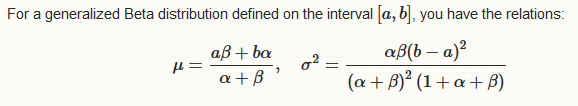
> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.
    
>2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.

**Parámetros de entrega**
Se habilitará un enlace en Canvas donde deben de subir su cuaderno de python con la solución dada. La fecha límite de recepción será el jueves 15 de octubre a las 18:00.

>1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.
    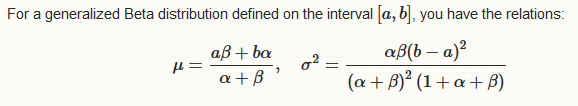
> **Ayuda**: - Aprender a utlizar el solucionador de ecuaciones no lineales https://stackoverflow.com/questions/19843116/passing-arguments-to-fsolve
- Leer el help de la función beta del paquete estadístico para aprender a graficar funciones beta en un intervalo diferente a 0 y 1.

In [1]:
# Librerías 
from scipy.optimize import fsolve
import scipy.stats as st 
from scipy.stats import triang  
from statistics import mode
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', 'The iteration is not making good progress') 


%matplotlib inline

## Sol 1 Betsy Torres

Alpha: 5991.028196510161
Beta: 7238.552667292481


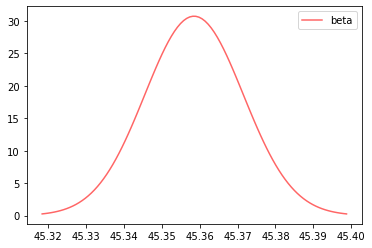

In [8]:
# Utilizando los datos del caso de estudio 1
miu, sigma, d = 44, np.sqrt(9), 47
#Límites inferior y superior
a, b= 40, 49

def func(x: 'Vector de valores para alpha y beta'):
    'Función para conocer alpha y beta a partir de miu y sigma proporcionados'
#     return [miu-((a*x[0]+b*x[1])/(x[1]+x[0])),
#             sigma**2-((x[1]*x[0]*(b-a)**2)/(((x[1]+x[0])**2)*(1+x[1]+x[0])))]
    alpha, beta = x
    return [((a * beta + b * alpha)/(alpha + beta)) - miu,
           ((alpha*beta*(b - a)*2) / ((alpha + beta)*2 *(1 + alpha + beta))) - sigma
           ]

#Ecuaciones no lineales
alpha, beta = fsolve(func, [1, 1])
print(f'Alpha: {alpha}\nBeta: {beta}')

# Grafico distribución
fig, ax = plt.subplots(1, 1)

def plot_beta_dist(alpha, beta, miu, sigma):
    x = np.linspace(st.beta.ppf(0.001, alpha, beta, loc=miu, scale=sigma),
                    st.beta.ppf(0.999, alpha, beta, loc=miu, scale=sigma), 
                    100)
    ax.plot(x, st.beta.pdf(x, alpha, beta, loc=miu, scale=sigma), 
            'r-', alpha=0.6, label='beta')
    plt.legend()

plot_beta_dist(alpha, beta, miu, sigma)

In [9]:
# prob=st.beta.cdf(d,b_a[1], b_a[0], scale=(b-a), loc=a)
prob=st.beta.cdf(d,beta, alpha, scale=(b-a), loc=a)
print("P (T <= d) =", prob*100, "%" )

P (T <= d) = 99.99999999999999 %


## Sol 1 Daniel Castillo



>2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$. Nuevamente aprender a graficar una función triangular en un intervalro [a,b], usando el help.


## Sol 2 Betsy Torres

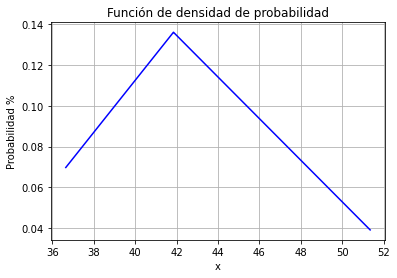

In [5]:
# Sol 1 Betsy Torres
p, o = 49, 40
miu, sigma, d = 44, 3, 47

def triang(x):
    'Función que genera el valor esperado, la varianza y mediana de la distrubucuón triangular basada en las fórmulas de cada parámentro'
    a = x[0]
    b = x[1]
    c = x[2]
    media = ((a+b+c)/ 3)-miu
    varianza = ((a**2 + b**2 + c**2 - (a*b) - (a*c) - (b*c))/18) - sigma**2
    mediana = c - miu
    return np.array([media,varianza,mediana])

t = fsolve(triang, [0,0,0])
# t

c = (t[2]-a)/(b-a)

x = np.linspace(a,b, 100000)

a_t = t[0]; b_t = t[1]
x_t = np.linspace(a_t,b_t, 100000)
y_acumt = st.triang.cdf(x_t, c, loc=a_t, scale=(b_t-a_t))
y_t = st.triang.pdf(x, c, loc=a_t, scale=(b_t-a_t))

plt.plot(x_t, y_t, c='b')
plt.ylabel('Probabilidad %')
plt.xlabel('x')
plt.title('Función de densidad de probabilidad')
plt.grid()
plt.show()

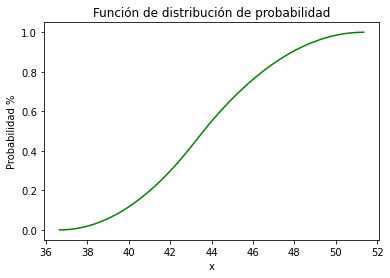

In [6]:
plt.plot(x_t, y_acumt, 'g')
plt.grid()
plt.title('Función de distribución de probabilidad')
plt.ylabel('Probabilidad %')
plt.xlabel('x')
plt.grid()
plt.show()

In [7]:
p_t = st.triang.cdf(d, c, loc=a, scale=(b-a))
print('P ( T <= d )=',p_t*100,'%')

P ( T <= d )= 91.11111111111111 %


## Sol 2 Daniel Castillo